# <center><font color='orange'>Cardiovascular Disease data Analysis</font></center> 


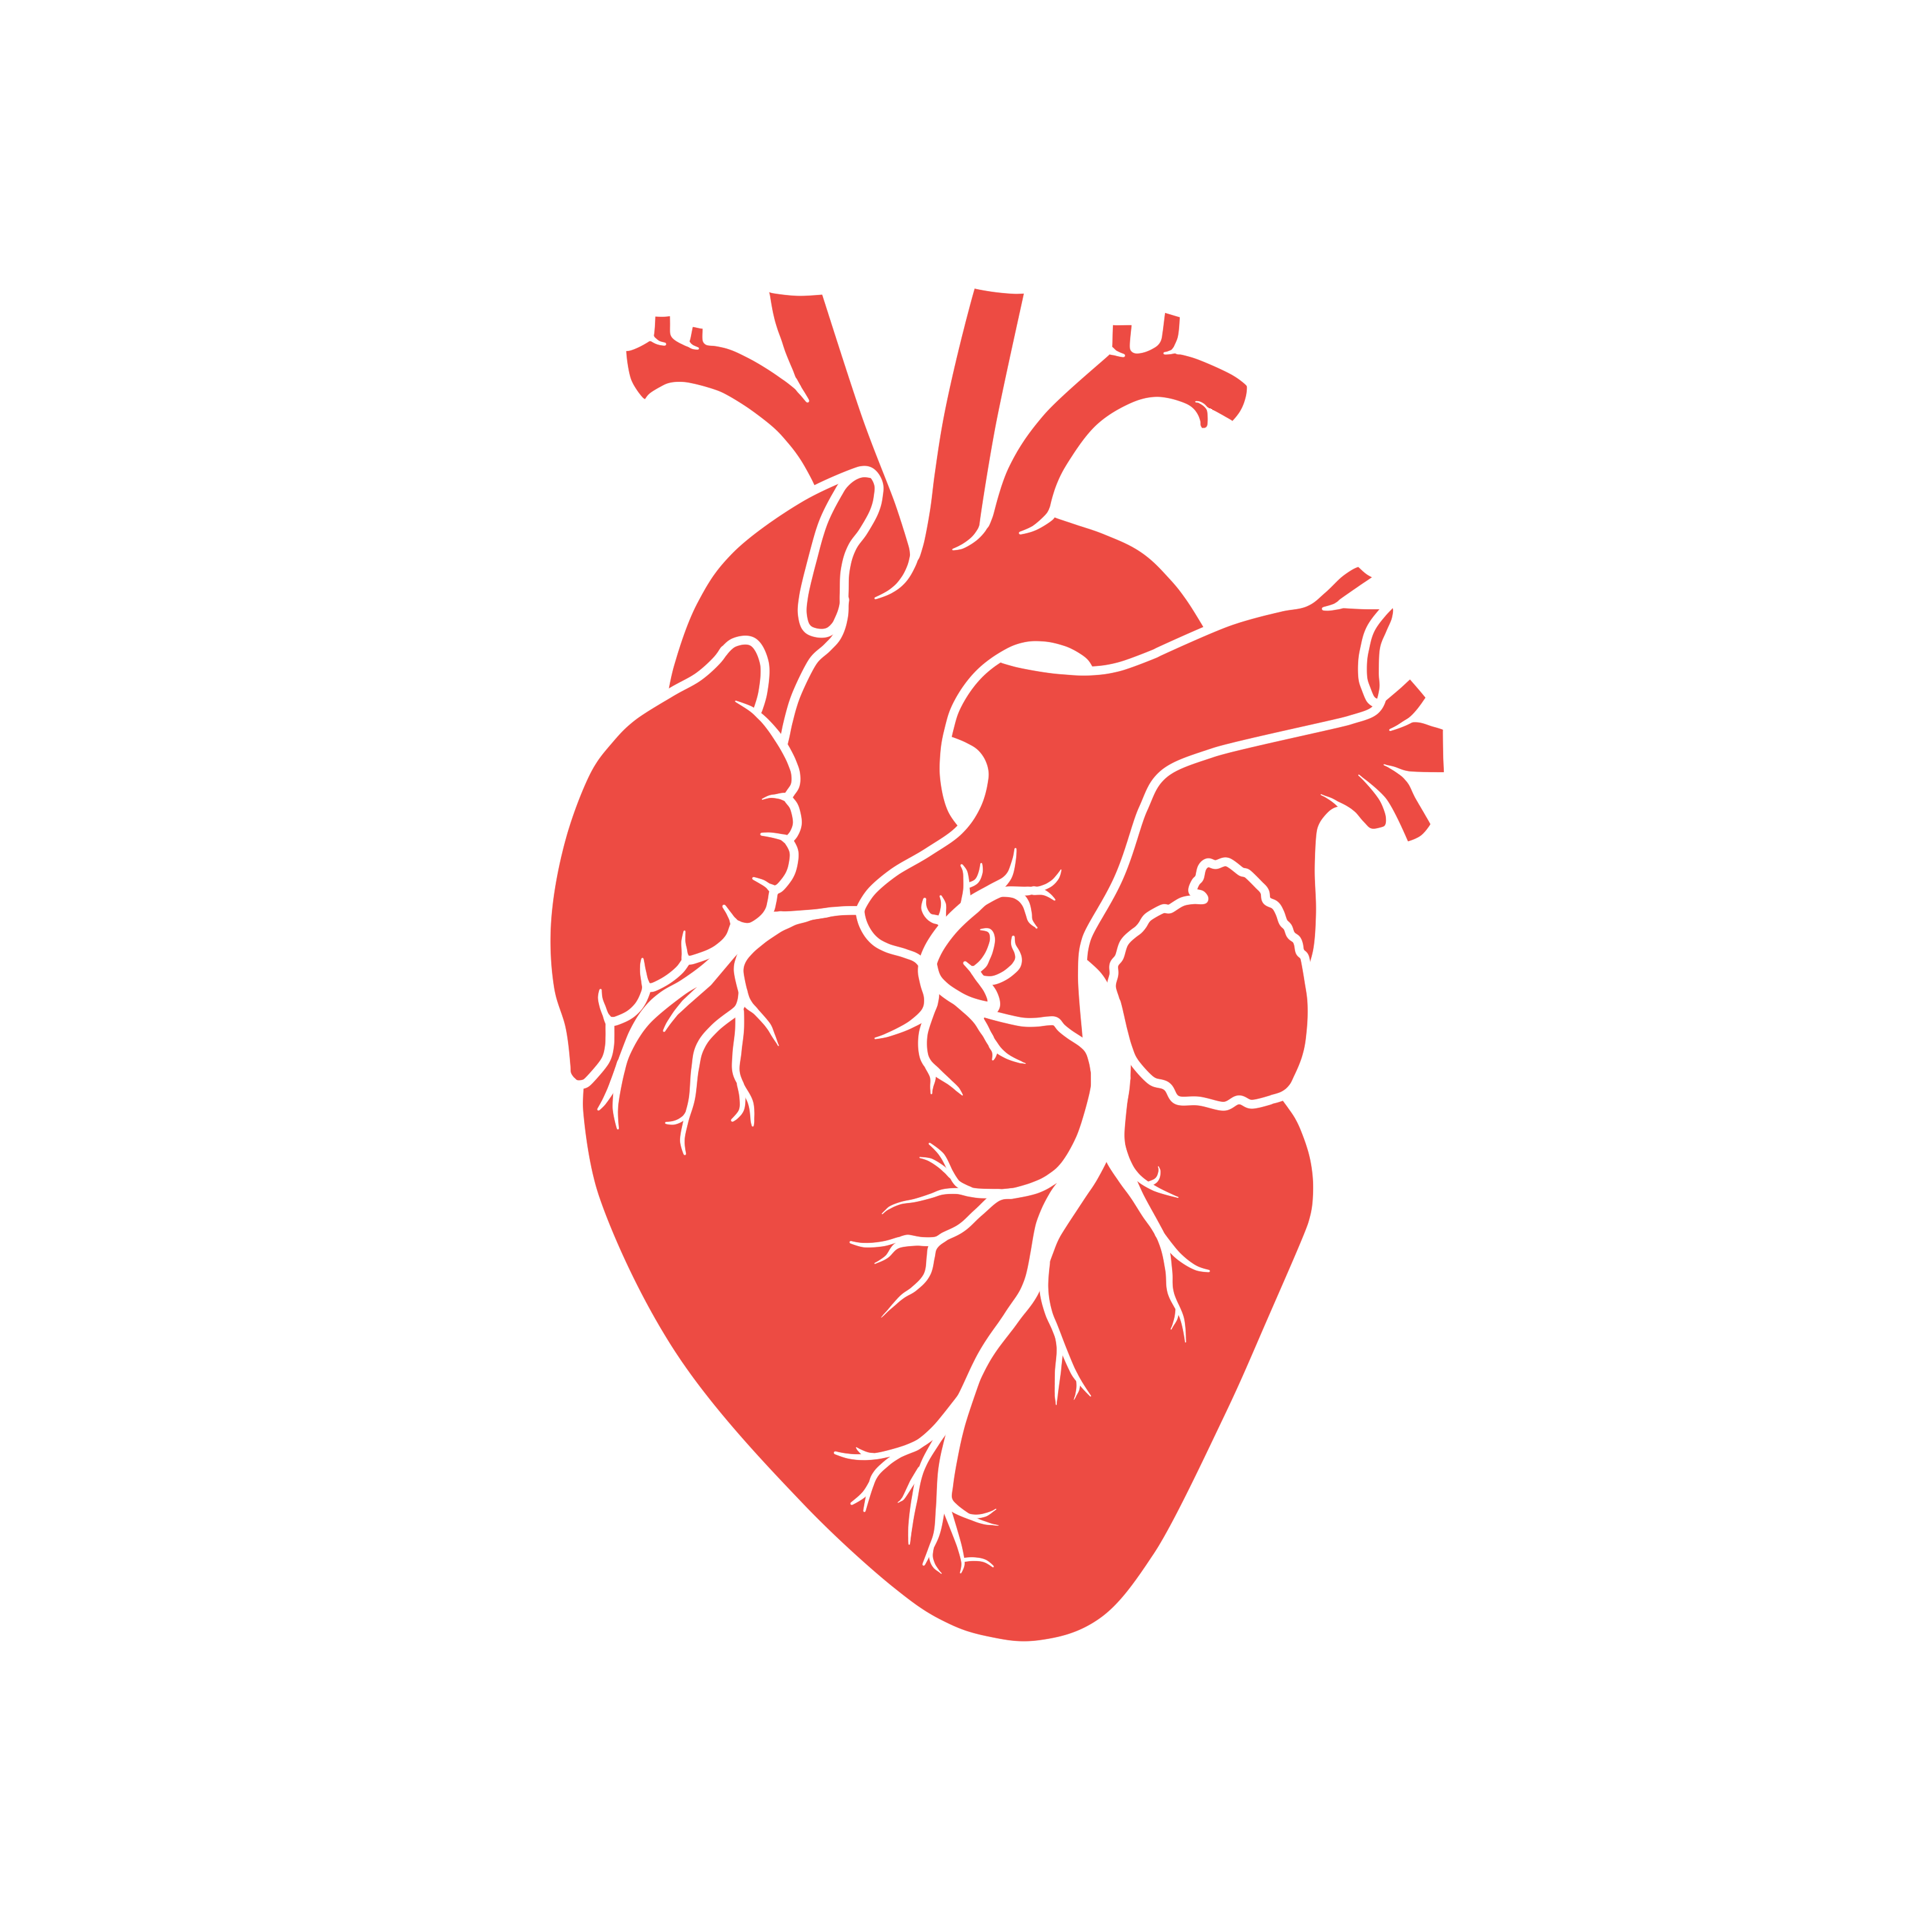

### <font color='green'> Primary Objective:</font>

- *To determine the factors which contribute to the presence of cardiovascular diseases*

In order to reach to a definitive answer to our objective, we need to answer some sub-questions first, namely,

- **Are there any serious outliers in the dataset that might negatively influence our conclusions ?**
- **What is the measure of linear association between the variables in the dataset ?**
- **Do habits like smoking/drinking have any effect on the presence of cardiovascular diseases ?**
- **Does being physically active reduce the risk of heart diseases ?**
- **Does a person’s height/weight make him/her more prone to heart diseases ?**
- **How is a person’s systolic/diastolic blood pressure associated with the presence of cardiovascular diseases ?**
- **Are old people at a greater risk than the younger ones ?Does the gender of a person also increase the presence of heart disease ?**
- **How is a person’s cholesterol/glucose level associated with the presence of cardiovascular diseases ?**
- **Does obesity increase the risk of heart disease ?**
- **Are there any serious outliers in the dataset that might negatively influence our conclusion ?**

We begin our analysis by plotting a box-plot of some variables in our dataset which we felt might need some cleaning.

In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
card = pd.read_csv('cardio_train.csv',delimiter=';')

In [5]:
card.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
card['age'] = card['age']/365
card['height'] = card['height']/100

In [7]:
card['age']=round(card['age'],2)

In [8]:
card['BMI'] = card['weight']/(card['height']*card['height'])
card['Pulse_pressure'] = card['ap_hi'] - card['ap_lo']

In [9]:
card['BMI'] = round(card['BMI'],2)

In [10]:
card['Age_group'] = pd.cut(card['age'],np.linspace(25,65,5))

In [11]:
card.dtypes

id                   int64
age                float64
gender               int64
height             float64
weight             float64
ap_hi                int64
ap_lo                int64
cholesterol          int64
gluc                 int64
smoke                int64
alco                 int64
active               int64
cardio               int64
BMI                float64
Pulse_pressure       int64
Age_group         category
dtype: object

In [12]:
card_bar = card[['age','height','weight','ap_hi','ap_lo','BMI','Pulse_pressure']]

In [13]:
card_bar.head()

,age,height,weight,ap_hi,ap_lo,BMI,Pulse_pressure
0,50.39,1.68,62.0,110,80,21.97,30
1,55.42,1.56,85.0,140,90,34.93,50
2,51.66,1.65,64.0,130,70,23.51,60
3,48.28,1.69,82.0,150,100,28.71,50
4,47.87,1.56,56.0,100,60,23.01,40


In [14]:
card['MAP'] = card['ap_lo'] + card['Pulse_pressure']/3
card['MAP'] = round(card['MAP'],2)

Now we will create a special column measuring the medical tension levels , called **MAP**

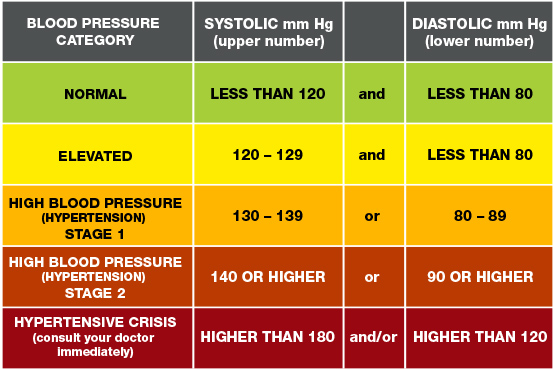

In [15]:
def f(x,y):
    if ((x<=120) & (y<=80)):
        return(1)
    elif (((x>120) & (x<=139))|((y>80)&(y<=89))):
        return(2)
    elif (((x>139) & (x<=159))|((y>89)&(y<=99))):
        return(3)
    else:
        return(4)

In [16]:
card['Tension_class'] = card[['ap_hi','ap_lo']].apply(lambda x: f(*x), axis=1)

In [17]:
card

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure,Age_group,MAP,Tension_class
0,0,50.39,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,30,"(45.0, 55.0]",90.00,1
1,1,55.42,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,50,"(55.0, 65.0]",106.67,3
2,2,51.66,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,60,"(45.0, 55.0]",90.00,2
3,3,48.28,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71,50,"(45.0, 55.0]",116.67,3
4,4,47.87,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01,40,"(45.0, 55.0]",73.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.71,2,1.68,76.0,120,80,1,1,1,0,1,0,26.93,40,"(45.0, 55.0]",93.33,1
69996,99995,61.92,1,1.58,126.0,140,90,2,2,0,0,1,1,50.47,50,"(55.0, 65.0]",106.67,3
69997,99996,52.24,2,1.83,105.0,180,90,3,1,0,1,0,1,31.35,90,"(45.0, 55.0]",120.00,3
69998,99998,61.45,1,1.63,72.0,135,80,1,2,0,0,0,1,27.10,55,"(55.0, 65.0]",98.33,2


We shall now create a column for the BMI values 

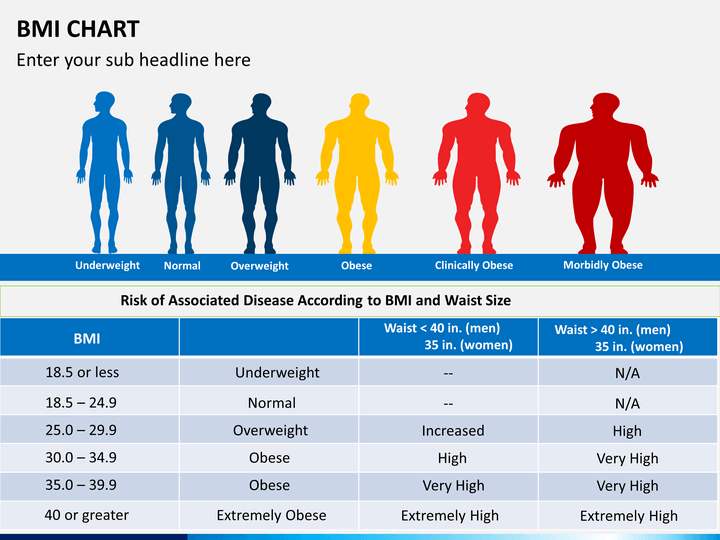

In [18]:
def f1(x):
    if x<18.5 :
        return(1)
    elif x<25 :
        return(2)
    elif x<30 :
        return(3)
    else:
        return(4)

In [19]:
card['BMI_status'] = card['BMI'].apply(f1)

Now, We begin our analysis by plotting a box-plot of some variables in our dataset which we felt might need some cleaning.

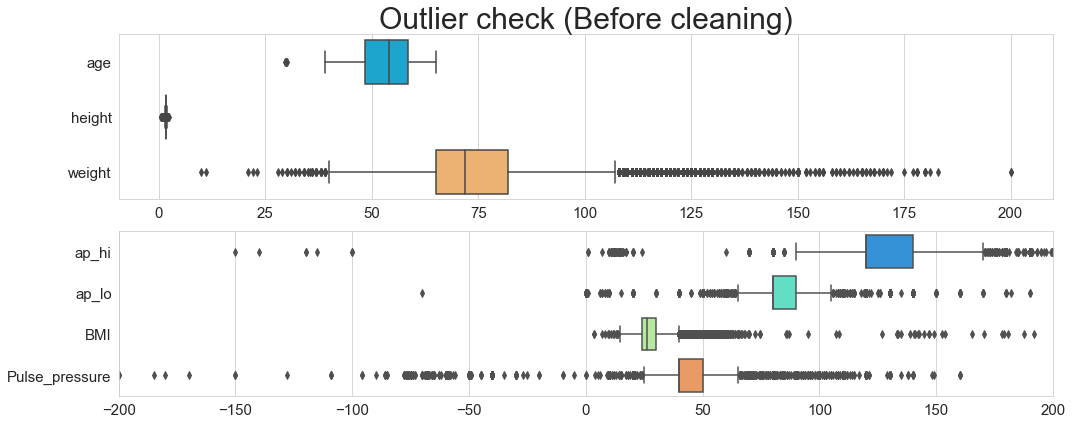

In [20]:
plt.figure(figsize=(15,6))

plt.subplot(211)
p = sns.boxplot(data=card_bar[card_bar.columns[:3]],palette='rainbow',orient='h')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Outlier check (Before cleaning)',fontsize=30)

plt.subplot(212)
p = sns.boxplot(data=card_bar[card_bar.columns[3:]],palette='rainbow',orient='h')
p.set_xlim(-200,200)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()

*From the boxplot above, we can observe there are a lot of serious outliers in the columns ap_hi, ap_lo, BMI, Pulse_Pressure, MAP as none of them can be negative. So we will discard the rows containing the outliers.* 

In [21]:
lst=['ap_hi','ap_lo','BMI','Pulse_pressure','MAP']
for i in lst:
    q1, q3 = np.percentile(card[i], 25), np.percentile(card[i], 75)
    iqr = q3 - q1
    lower = q1 - (iqr*1.5)
    upper = q3 + (iqr*1.5)
    card = card[(card[i] > lower) & (card[i] < upper)]

In [22]:
card.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure,Age_group,MAP,Tension_class,BMI_status
0,0,50.39,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97,30,"(45.0, 55.0]",90.00,1,2
1,1,55.42,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93,50,"(55.0, 65.0]",106.67,3,4
2,2,51.66,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51,60,"(45.0, 55.0]",90.00,2,2
5,8,60.04,1,1.51,67.0,120,80,2,2,0,0,0,0,29.38,40,"(55.0, 65.0]",93.33,1,3
6,9,60.58,1,1.57,93.0,130,80,3,1,0,0,1,0,37.73,50,"(55.0, 65.0]",96.67,2,4


In [23]:
len(card)

54098

In [24]:
card_bar1 = card[['age','height','weight','ap_hi','ap_lo','BMI','Pulse_pressure']]

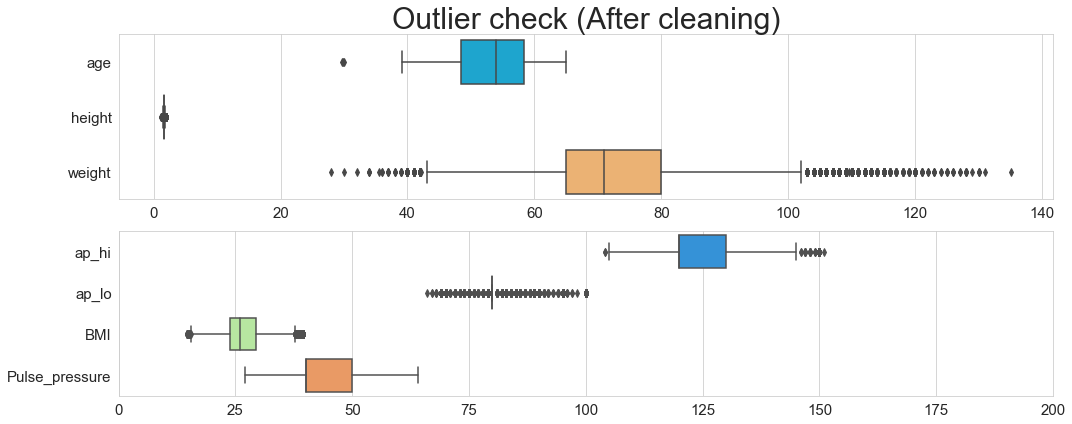

In [25]:
plt.figure(figsize=(15,6))
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)

plt.subplot(211)
p = sns.boxplot(data=card_bar1[card_bar1.columns[:3]],palette='rainbow',orient='h')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Outlier check (After cleaning)',fontsize=30)

#plt.xticks(rotation=45)

plt.subplot(212)
p = sns.boxplot(data=card_bar1[card_bar1.columns[3:]],palette='rainbow',orient='h')
p.set_xlim(0,200)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.xticks(rotation=45)

plt.tight_layout()

*As we can see the serious outliers are gone.*

In [26]:
card_cor = card.corr(); card_cor.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure,MAP,Tension_class,BMI_status
id,1.000000,0.004429,0.003660,-0.002326,0.001560,0.004651,-0.002501,0.004530,-0.004993,-0.002434,0.000068,0.004429,0.005494,0.002976,0.008623,0.000803,0.002039,0.002135
age,0.004429,1.000000,-0.040704,-0.093809,0.036242,0.183546,0.133322,0.145366,0.090853,-0.053662,-0.029753,-0.009510,0.231884,0.095769,0.144476,0.168813,0.154132,0.087608
gender,0.003660,-0.040704,1.000000,0.507755,0.200604,0.034867,0.040848,-0.038916,-0.022382,0.334222,0.167197,0.004333,-0.011189,-0.093916,0.014346,0.041236,0.020063,-0.076922
height,-0.002326,-0.093809,0.507755,1.000000,0.384250,-0.000649,0.018672,-0.056031,-0.021758,0.189294,0.094989,-0.013704,-0.022437,-0.184827,-0.016666,0.010707,-0.021958,-0.164436
weight,0.001560,0.036242,0.200604,0.384250,1.000000,0.205159,0.182562,0.117052,0.078660,0.084439,0.072150,-0.012583,0.139154,0.832012,0.133182,0.208512,0.190792,0.764163


- ### What is the measure of linear association between the variables in the dataset? 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text major ticklabel objects>)

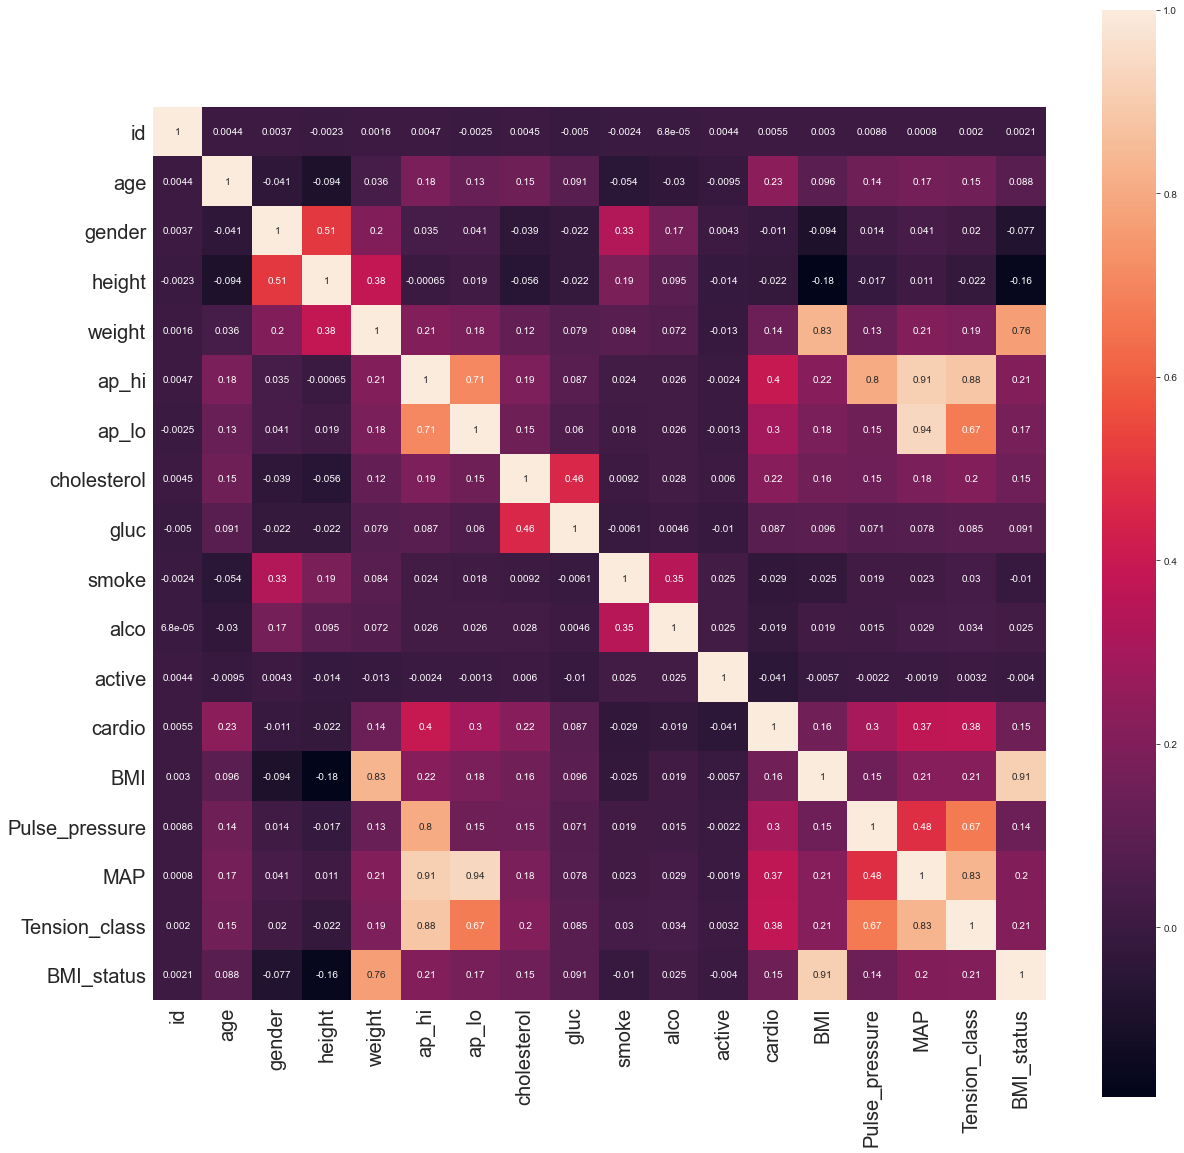

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(card_cor,annot=True,square=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Looking at the row corresponding to the ‘cardio’ variable, we observe that there is a moderate to strong linear association between the presence of cardiovascular diseases (cardio) and :

1. Age
2. Systolic blood pressure (ap_hi)
3. Diastolic blood pressure (ap_lo)
4. Cholesterol

In [34]:
card['gender']=card['gender'].map({1:'F',2:'M'})
card['smoke']=card['smoke'].map({0:'no',1:'yes'})
card['alco']=card['alco'].map({0:'no',1:'yes'})
card['active']=card['active'].map({0:'no',1:'yes'})
card['Tension_class']=card['Tension_class'].map({1:'Normal',2:'Prehypertension',3:'Stage 1 Hypertension',4:'Stage 2 Hypertension'})
card['BMI_status']=card['BMI_status'].map({1:'Underweight',2:'Normal',3:'Overweight',4:'Obese'})

In [35]:
card

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Pulse_pressure,Age_group,MAP,Tension_class,BMI_status
0,0,50.39,M,1.68,62.0,110,80,1,1,no,no,yes,0,21.97,30,"(45.0, 55.0]",90.00,Normal,Normal
1,1,55.42,F,1.56,85.0,140,90,3,1,no,no,yes,1,34.93,50,"(55.0, 65.0]",106.67,Stage 1 Hypertension,Obese
2,2,51.66,F,1.65,64.0,130,70,3,1,no,no,no,1,23.51,60,"(45.0, 55.0]",90.00,Prehypertension,Normal
5,8,60.04,F,1.51,67.0,120,80,2,2,no,no,no,0,29.38,40,"(55.0, 65.0]",93.33,Normal,Overweight
6,9,60.58,F,1.57,93.0,130,80,3,1,no,no,yes,0,37.73,50,"(55.0, 65.0]",96.67,Prehypertension,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,99988,56.46,F,1.59,72.0,130,90,2,2,no,no,yes,0,28.48,40,"(55.0, 65.0]",103.33,Prehypertension,Overweight
69993,99991,53.97,F,1.72,70.0,130,90,1,1,no,no,yes,1,23.66,40,"(45.0, 55.0]",103.33,Prehypertension,Normal
69995,99993,52.71,M,1.68,76.0,120,80,1,1,yes,no,yes,0,26.93,40,"(45.0, 55.0]",93.33,Normal,Overweight
69998,99998,61.45,F,1.63,72.0,135,80,1,2,no,no,no,1,27.10,55,"(55.0, 65.0]",98.33,Prehypertension,Overweight


Let us check if the overall mass diversity of the whole data follows the natural trend or not,

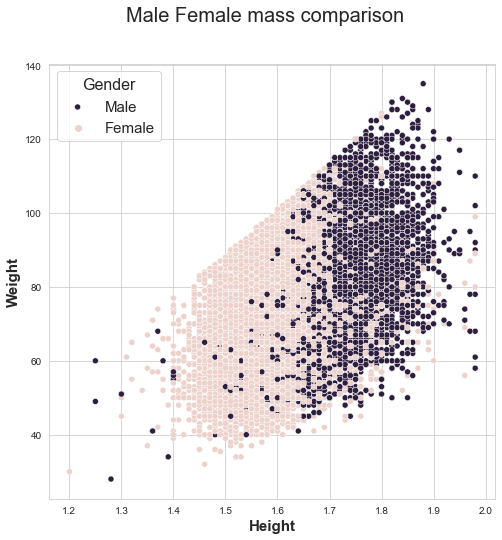

In [32]:
fig,ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=card,x='height',y='weight',hue='gender')
fig.suptitle('Male Female mass comparison',fontsize=20)
ax.set_xlabel('Height',fontsize=15,fontweight='bold')
ax.set_ylabel('Weight',fontsize=15,fontweight='bold')
ax.legend(title='Gender',loc='upper left',title_fontsize=16 ,fontsize=15, labels=['Male', 'Female'])

*It is clear for the scatterplot that the distribution of height and weight of the observed sample set follows the natural trend, and is positively correlated, as is also evident from the heatmap.*

- ### Do habits like smoking/drinking have any effect on the presence of cardiovascular diseases ?

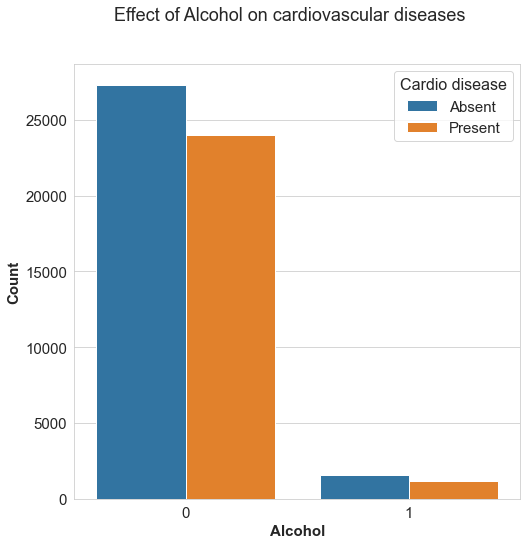

In [30]:
# cardio vs alcohol
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(data=card,x='alco', hue='cardio')
fig.suptitle('Effect of Alcohol on cardiovascular diseases',fontsize=18)
ax.set_xlabel('Alcohol',fontsize=15,fontweight='bold')
ax.set_ylabel('Count',fontsize=15,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Cardio disease',loc='upper right',title_fontsize=16 ,fontsize=15, labels=['Absent', 'Present'])

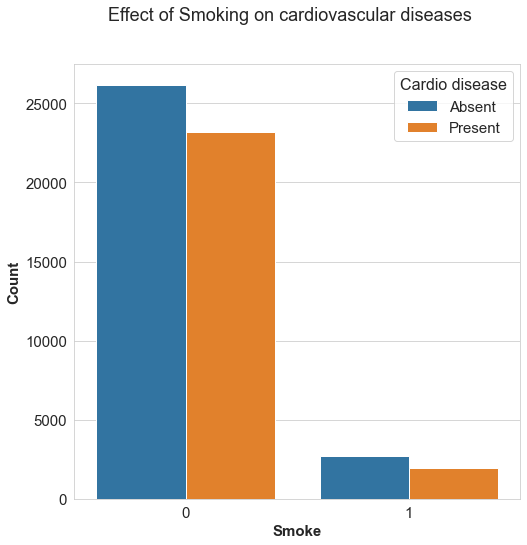

In [29]:
# smoke vs cardio
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(data=card,x='smoke', hue='cardio')
fig.suptitle('Effect of Smoking on cardiovascular diseases',fontsize=18)
ax.set_xlabel('Smoke',fontsize=15,fontweight='bold')
ax.set_ylabel('Count',fontsize=15,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Cardio disease',loc='upper right',title_fontsize=16, fontsize=15, labels=['Absent', 'Present'])

*From the above bar chart, we can conclude that our chosen dataset is highly imbalanced when it comes to smokers/non-smokers and alcohol consumers/non-consumers. Due to the dominance of one group over the other, it is not possible to derive any meaningful observation from the plot.*

- ### Does being physically active reduce the risk of heart diseases ?

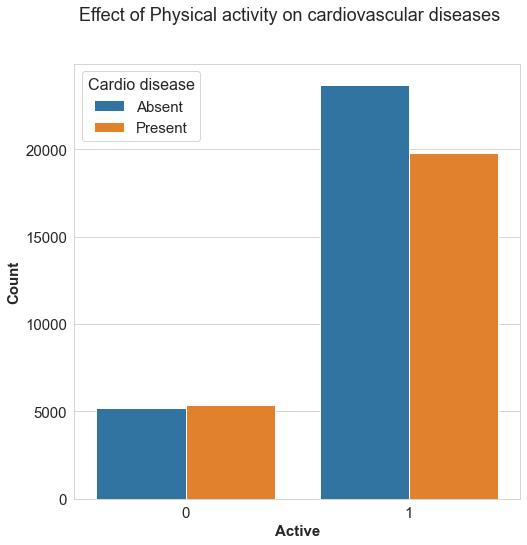

In [28]:
# active vs cardio
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(data=card,x='active', hue='cardio')
fig.suptitle('Effect of Physical activity on cardiovascular diseases',fontsize=18)
ax.set_xlabel('Active',fontsize=15,fontweight='bold')
ax.set_ylabel('Count',fontsize=15,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Cardio disease',loc='upper left',title_fontsize=16 ,fontsize=15, labels=['Absent', 'Present'])

*Observation : People who are physically active have a lesser risk of cardiovascular diseases than those who are not.*

- ### Does a person’s height/weight make him/her more prone to heart diseases ?

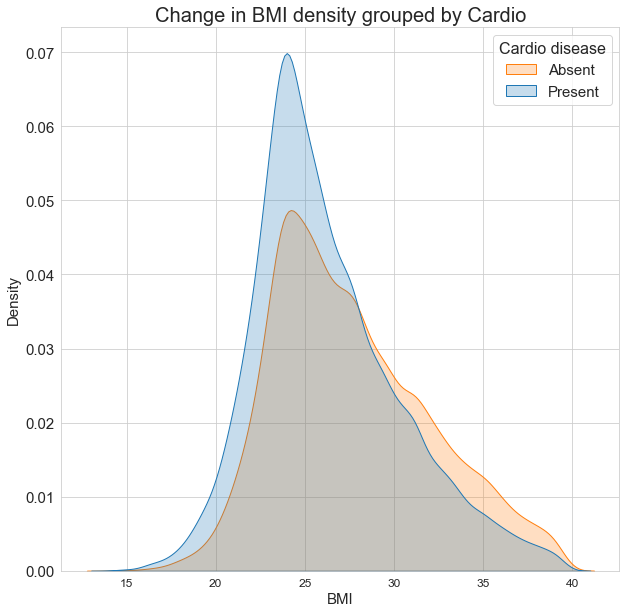

In [33]:
# BMI vs cardio
plt.figure(figsize=(10,10))
sns.kdeplot(data=card,x='BMI',hue='cardio',fill=True)
plt.xlabel('BMI',size=15)
plt.ylabel('Density',size=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.title('Change in BMI density grouped by Cardio',size=20)
plt.legend(title='Cardio disease',loc='upper right',title_fontsize=16, fontsize=15, labels=['Absent', 'Present'])

*BMI captures both height and weight so we use it to determine the latter’s effect on cardiovascular diseases. From the density plot above, we observe that at lower BMI values, absence of heart diseases predominates the presence of the same, while at higher values of BMI, the reverse holds true.*

- ### How is a person’s systolic/diastolic blood pressure associated with the presence of cardiovascular diseases ?

We shall now analyse the effect of tension class on heart diseases, for which we group systolic and diastolic pressure values in our dataset in groups according to the above table.

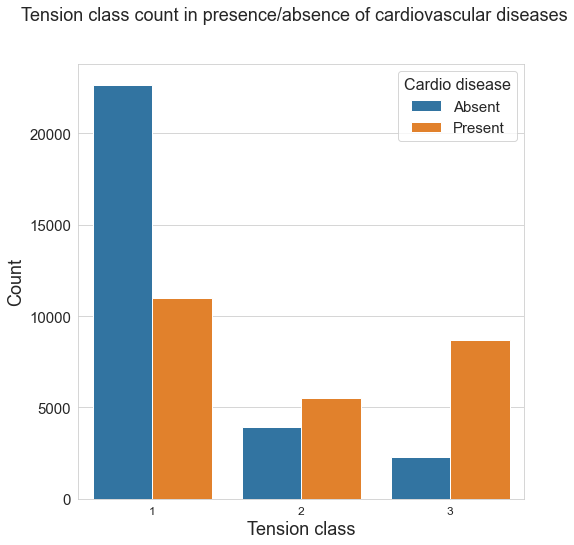

In [34]:
# tension scale vs cardio
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(data=card,x='Tension_class', hue='cardio')
fig.suptitle('Tension class count in presence/absence of cardiovascular diseases',fontsize=18)
ax.set_xlabel('Tension class',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.legend(title='Cardio disease',loc='upper right',title_fontsize=16, fontsize=15, labels=['Absent', 'Present'])

*Observation : In case of Normal and Prehypertension levels of blood pressure, significantly less people are at a risk of heart diseases, while people with Stage 1 Hypertension are at a much greater risk.*

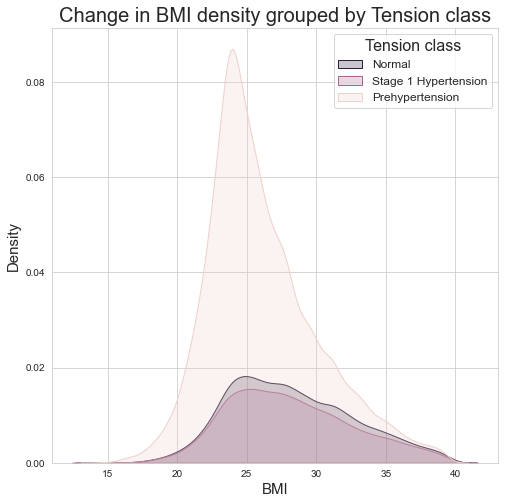

In [35]:
# BMI vs tension_class
fig,ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data=card,x='BMI',hue='Tension_class',fill=True)
plt.xlabel('BMI',size=15)
plt.ylabel('Density',size=15)
plt.title('Change in BMI density grouped by Tension class',size=20)
plt.legend(title='Tension class',loc='upper right',title_fontsize=16, fontsize=12, labels=['Normal','Stage 1 Hypertension','Prehypertension'])

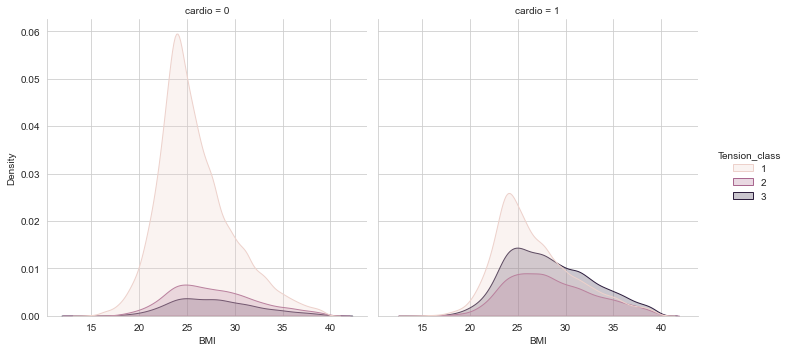

In [37]:
# bmi vs tension_class faceted by cardio
sns.displot(x="BMI", hue="Tension_class", fill=True, col="cardio", data=card, kind="kde",alpha=0.25)

*Observation : As we move higher up along the Tension class, we observe a steady increase in the mean BMI, which proves to be a strong indicator of heart diseases.*

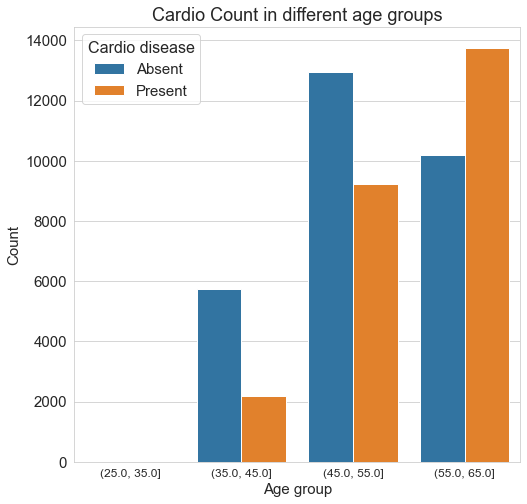

In [38]:
# age_group vs cardio
plt.figure(figsize=(8,8))
sns.countplot(data=card,x='Age_group',hue='cardio')
plt.title('Cardio Count in different age groups',fontsize=18)
plt.xlabel('Age group',size=15)
plt.ylabel('Count',size=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.legend(title='Cardio disease',loc='upper left',title_fontsize=16, fontsize=15, labels=['Absent', 'Present'])

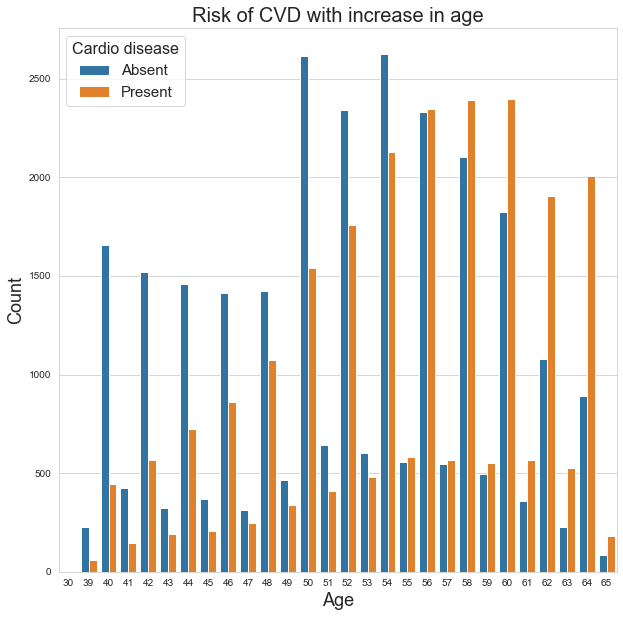

In [39]:
# age vs cardio
plt.figure(figsize=(10,10))
card['age']=card['age'].round().astype('int')
sns.countplot(data=card,x='age',hue='cardio')
plt.xlabel('Age',size=18)
plt.ylabel('Count',size=18)
plt.title('Risk of CVD with increase in age',size=20)
plt.legend(title='Cardio disease',loc='upper left',title_fontsize=16, fontsize=15, labels=['Absent', 'Present'])

*Observation : In general, the risk of cardiovascular disease is greater in older people than in younger ones.*


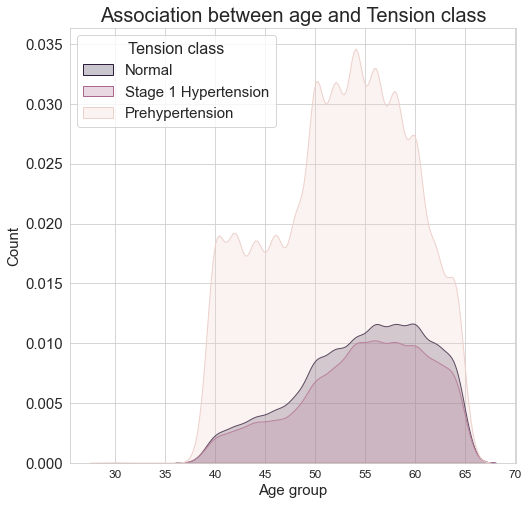

In [40]:
# age vs tension_class
plt.figure(figsize=(8,8))
sns.kdeplot(x="age", hue="Tension_class", fill=True, data=card,alpha=0.25)
plt.title('Association between age and Tension class',size=20)
plt.xlabel('Age group',size=15)
plt.ylabel('Count',size=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.legend(title='Tension class',loc='upper left',title_fontsize=16, fontsize=15,labels=['Normal','Stage 1 Hypertension','Prehypertension'])

*Higher age is associated with higher level in the Tension class, which again is a strong indicator of cardiovascular diseases. This helps solidify our conjecture that higher age is associated greater risk of heart diseases.*

- ### How is a person’s cholesterol/glucose level associated with the presence of cardiovascular diseases ?

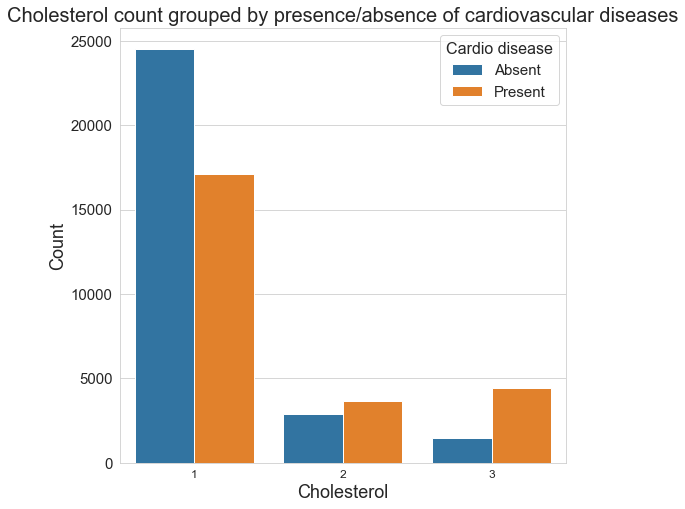

In [41]:
# cholesterol vs cardio
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(data=card,x='cholesterol', hue='cardio')
plt.title('Cholesterol count grouped by presence/absence of cardiovascular diseases',fontsize=20)
ax.set_xlabel('Cholesterol',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.legend(title='Cardio disease',loc='upper right', title_fontsize=16, fontsize=15, labels=['Absent', 'Present'])


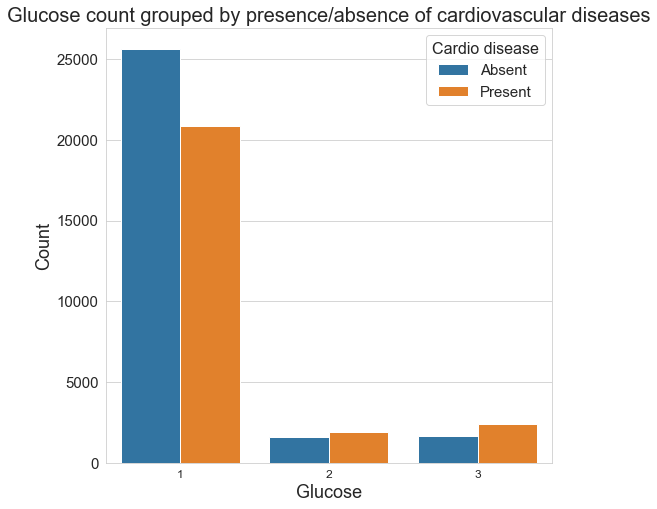

In [42]:
# glucose vs cardio
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(data=card,x='gluc', hue='cardio')
plt.title('Glucose count grouped by presence/absence of cardiovascular diseases',fontsize=20)
ax.set_xlabel('Glucose',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.legend(title='Cardio disease',loc='upper right', title_fontsize=16,fontsize=15, labels=['Absent', 'Present'])


*Observation : People with normal glucose levels are less likely to have heart diseases, while those who have their cholesterol levels above and well above normal are more prone to the same.*

- ### Does obesity increase the risk of heart disease ?

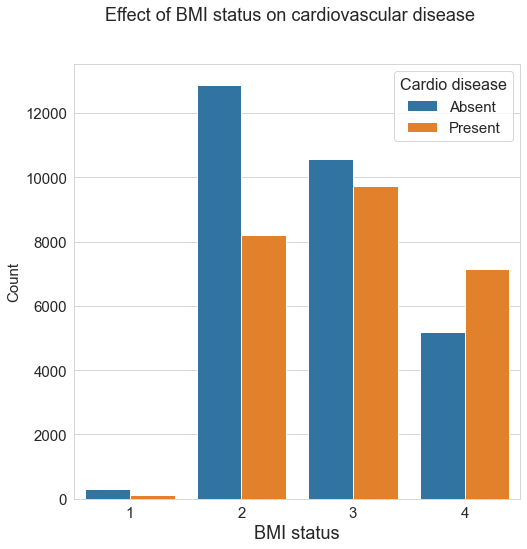

In [43]:
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(data=card,x='BMI_status', hue='cardio')
fig.suptitle('Effect of BMI status on cardiovascular disease',fontsize=18)
ax.set_xlabel('BMI status',fontsize=18)
ax.set_ylabel('Count',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Cardio disease',loc='upper right',title_fontsize=16, fontsize=15, labels=['Absent', 'Present'])

*Observation : Obese people are at a much greater risk of getting heart diseases than people with normal body weight.*

## <font color= 'green'> CONCLUSION</font> :

From our analysis of the cardiovascular disease dataset, it is evident that the main contributing factors of heart diseases are :
1. Age
2. BMI / BMI status
3. Systolic, diastolic blood pressure / Tension class
4. Cholesterol level
5. Glucose level

There are also some inter-relations between the factors listed above, which we have established through our analysis.